* Name : Lan Tran
* Professor: Dr. Landowski 
* Class: IST 652 - Scripting for Data Analysis Winter 2021
-------------------------------------------------
* Assignment: Final Project 
* Topic: Hospital Accessibility & Geographic Make-up
-------------------------------------------------

RESEARCH QUESTIONS:
-------------------------------------
1. How accessible are the hospital for those who are of low income or elderly?
2. Are there specific factors/attributes that contribute to the hospital locality? 
3. Are the hospital beds sufficient for the population at hand? If not, what is gap between actual and benchmark?
4. What are the current hospital ratings and what specifications comprise of the ratings?



LOADING THE DATA:
-------------------------------------

In [1]:
#-------------------------------------#
# installation of packages:
#-------------------------------------#
'''
conda install -c conda-forge geopandas

'''
#-------------------------------------#
# import packages:
#-------------------------------------#
import os
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import pyplot
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objects as go


#-------------------------------------#
# inline plotting:
#-------------------------------------#

# for plotting inline for plotly you need to download
# conda install -c plotly chart-studio and get credentials & api key to display
# https://plotly.com/python/renderers/

tls.set_credentials_file(username='Latran', api_key='7j4HLSxBeKDzdm2Bt5jW')

#to plot within jupyter notebook
%matplotlib inline  


#-------------------------------------#
# Validate directory:
#-------------------------------------#

# Get directory: Make sure the directory is where you want it to be
print(os.getcwd())  

#change directory: data housed in a different download location
os.chdir(r'C:\Users\Lan\Desktop\_Syracruse\6_IST_652_ScriptingForDataAnalysis_Winter21\Final Projects\Hospital_Geo\DataFile_to_use')
print(os.getcwd())  



C:\Users\Lan\Desktop\_Syracruse\6_IST_652_ScriptingForDataAnalysis_Winter21\Final Projects\Hospital_Geo
C:\Users\Lan\Desktop\_Syracruse\6_IST_652_ScriptingForDataAnalysis_Winter21\Final Projects\Hospital_Geo\DataFile_to_use


In [2]:
#-------------------------------------#
# reading in the data : Hospital
#-------------------------------------#
# read the data as a dataframe. Make sure the data file is in the same location

#---------------------------------------
# 1. HOSPITAL GENERAL (HIFLD) dataset:
#---------------------------------------
data='Hospitals.csv'
hosp_df=pd.read_csv(
                data,
                # takes in the first row as header, if no header use 'null'
                header=0,
                 # Assigns Index_ID as the index 
                #index_col=['OBJECTID'],                                           
                # selected columns to read in
                usecols=['OBJECTID','NAME','CITY',
                        'STATE','TYPE','STATUS',
                        'LATITUDE','LONGITUDE','NAICS_CODE',
                        'NAICS_DESC','ST_FIPS',
                        'BEDS','TRAUMA','HELIPAD'],)


#---------------------------------------
# 2. HOSPITAL CMS RATING:
#---------------------------------------
rating='Hospital_General_Information_rating.csv'
rating_df=pd.read_csv(
                rating,
                # takes in the first row as header, if no header use 'null'
                header=0,
                 # Assigns Index_ID as the index 
                index_col=['Facility ID'],                                           
                # selected columns to read in
                usecols=['Facility ID','Facility Name',
                         'Address','City','State','ZIP Code',
                         'County Name','Hospital Type',
                         'Hospital Ownership','Emergency Services',
                         'Meets criteria for promoting interoperability of EHRs',
                         'Hospital overall rating','Mortality national comparison',
                         'Safety of care national comparison',
                         'Readmission national comparison',
                         'Patient experience national comparison',
                         'Effectiveness of care national comparison',
                         'Timeliness of care national comparison',
                         'Efficient use of medical imaging national comparison'],)


#---------------------------------------
# 3. MEDICAID & CHIP ENROLLMENT:
#---------------------------------------
medicaid ='Medicaid_2021_byGeo.csv'
medicaid_df=pd.read_csv(
                medicaid,
                # takes in the first row as header, if no header use 'null'
                header=0,
                # Assigns Index_ID as the index 
                #  index_col=['Facility ID'],                                           
                # selected columns to read in
                usecols=['State Abbreviation','State Name',
                         'State Expanded Medicaid',
                         'New Applications Submitted to Medicaid and CHIP Agencies',
                         'Total Applications for Financial Assistance Submitted at State Level',
                         'Medicaid and CHIP Child Enrollment','Total Medicaid Enrollment ',
                         'Latitude','Longitude'],)

#---------------------------------------
# 4. INCOME BY STATES:
#---------------------------------------
income ='Income.csv'
income_df=pd.read_csv(
                income,
                # takes in the first row as header, if no header use 'null'
                header=0,
                # Assigns Index_ID as the index 
                #  index_col=['Facility ID'],                                           
                # selected columns to read in
                usecols=['State','Code',
                         'Median income'],)



#---------------------------------------
# 6. COMBINED BY STATES:
#---------------------------------------
combined ='Combined_Hospital.csv'
combined_df=pd.read_csv(
                combined,
                # takes in the first row as header, if no header use 'null'
                header=0,
                # Assigns Index_ID as the index 
                #  index_col=['Facility ID'],                                           
                # selected columns to read in
                usecols=['State','RATING','CHILDREN','CHRONIC DISEASE','CRITICAL ACCESS',
                        'GENERAL ACUTE CARE','LONG TERM CARE','MILITARY','PSYCHIATRIC',
                        'REHABILITATION','SPECIAL','WOMEN','BEDS','MEDICAID','MEDIAN INCOME','2020 POPULATION','HOSP_CNT',
                        'M_0-10','M_11-20','M_21-30','M_30-40','M_40-50','M_50-60','M_60-65','M_65+','F_0-10','F_11-20',
                         'F_21-30','F_30-40','F_40-50','F_50-60','F_60-65','F_65+'],)


# or you can review the first 5 rows of the read in table 
# rating_df.head()




DATA CLEANING: 
-------------------------

In [3]:
# print the dataset to evaluate:
# hosp_df, rating_df, medicaid_df, income_df, demographic_df, combined_df

table = hosp_df

print('data frame description: \n')
table.describe(include='all')

data frame description: 



,OBJECTID,NAME,CITY,STATE,TYPE,STATUS,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,ST_FIPS,BEDS,TRAUMA,HELIPAD
count,7596.000000,7596,7596,7596,7596,7596,7596.000000,7596.000000,7596.000000,7596,7596.000000,7289.000000,7596,7596
unique,NaN,7342,3373,57,10,2,NaN,NaN,NaN,17,NaN,NaN,34,2
top,NaN,MEMORIAL HOSPITAL,HOUSTON,TX,GENERAL ACUTE CARE,OPEN,NaN,NaN,NaN,GENERAL MEDICAL AND SURGICAL HOSPITALS,NaN,NaN,NOT AVAILABLE,Y
freq,NaN,12,71,805,4481,7277,NaN,NaN,NaN,5945,NaN,NaN,5472,4177
mean,3804.314376,NaN,NaN,NaN,NaN,NaN,37.315784,-92.400566,622142.161664,NaN,29.472354,146.131294,NaN,NaN
std,2197.027537,NaN,NaN,NaN,NaN,NaN,5.782089,16.256966,67.195200,NaN,16.320051,176.749369,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-14.290242,-176.640263,622110.000000,NaN,1.000000,2.000000,NaN,NaN
25%,1901.750000,NaN,NaN,NaN,NaN,NaN,33.456961,-98.219939,622110.000000,NaN,17.000000,30.000000,NaN,NaN
50%,3802.500000,NaN,NaN,NaN,NaN,NaN,37.967960,-90.088579,622110.000000,NaN,29.000000,77.000000,NaN,NaN
75%,5707.250000,NaN,NaN,NaN,NaN,NaN,41.299913,-81.741333,622110.000000,NaN,44.000000,196.000000,NaN,NaN


In [4]:
#-------------------------------------#
# re-naming data header:
#-------------------------------------#
rating_df = rating_df.rename(columns={'Mortality national comparison': 'Mortality',
                                      'Safety of care national comparison': 'Safety',
                                      'Readmission national comparison': 'Readmission',
                                      'Patient experience national comparison': 'Patient Experience',
                                      'Effectiveness of care national comparison': 'Effectiveness of care', 
                                      'Timeliness of care national comparison': 'Timeliness',
                                      'Efficient use of medical imaging national comparison': 'Efficient use of medical imaging',})


medicaid_df = medicaid_df.rename(columns={'State Expanded Medicaid': 'Expansion',
                                      'New Applications Submitted to Medicaid and CHIP Agenciesn': 'New Enrollment',
                                      'Total Applications for Financial Assistance Submitted at State Level': 'Total Applicant',})




# print out the dataframe to see 
#print(rating_df) 


#-------------------------------------#
# Checking for missing data:
#-------------------------------------#
# if it's a larger dataset and the visualization takes too long can do this.
# this shows the % of missing items as a percentage by column name.
# there are only 6 columns presented because Index is an index which assumes no
# missing values

print('hospital missing data:\n')
for col in hosp_df.columns:
    pct_missing = np.mean(hosp_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print('-'*100)
print('Hospital rating missing data:\n')
for col in rating_df.columns:
    pct_missing = np.mean(rating_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
print('-'*100)
print('Medicaid missing data:\n')
for col in medicaid_df.columns:
    pct_missing = np.mean(medicaid_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print('-'*100)
print('Income missing data:\n')
for col in income_df.columns:
    pct_missing = np.mean(income_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

    
print('-'*100)
print('Combined missing data:\n')
for col in combined_df.columns:
    pct_missing = np.mean(combined_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    


hospital missing data:

OBJECTID - 0%
NAME - 0%
CITY - 0%
STATE - 0%
TYPE - 0%
STATUS - 0%
LATITUDE - 0%
LONGITUDE - 0%
NAICS_CODE - 0%
NAICS_DESC - 0%
ST_FIPS - 0%
BEDS - 4%
TRAUMA - 0%
HELIPAD - 0%
----------------------------------------------------------------------------------------------------
Hospital rating missing data:

Facility Name - 0%
Address - 0%
City - 0%
State - 0%
ZIP Code - 0%
County Name - 0%
Hospital Type - 0%
Hospital Ownership - 0%
Emergency Services - 0%
Meets criteria for promoting interoperability of EHRs - 29%
Hospital overall rating - 0%
Mortality - 0%
Safety - 0%
Readmission - 0%
Patient Experience - 0%
Effectiveness of care - 0%
Timeliness - 0%
Efficient use of medical imaging - 0%
----------------------------------------------------------------------------------------------------
Medicaid missing data:

State Abbreviation - 0%
State Name - 0%
Expansion - 0%
New Applications Submitted to Medicaid and CHIP Agencies - 4%
Total Applicant - 2%
Medicaid and CHI

In [5]:
#-------------------------------------#
# Understanding the data: DATA TYPE
#-------------------------------------#
#shape and data type of the data. If there are any discrepancies in data type,
# you should convert it to proper type here

# hosp_df, rating_df, medicaid_df, income_df, demographic_df

# hospital dataset:
#-------------------------------------#
print('Hospital rows by Columns in df :', hosp_df.shape)             
print('-'*100)
print('datatype \n',hosp_df.dtypes)                         
print('-'*100)



# CMS Rating dataset:
#-------------------------------------#
print('Rating rows by Columns in df :', rating_df.shape)             
print('-'*100)
print('datatype \n',rating_df.dtypes)                         
print('-'*100)

# convert hospital ratings to float in order to graph it as a numeric
print(pd.to_numeric(rating_df['Hospital overall rating'], errors='coerce'))
rating_df['Hospital overall rating']=pd.to_numeric(rating_df['Hospital overall rating'], errors='coerce')




# Medicaid enrollment dataset:
#-------------------------------------#
print('Medicaid enrollment rows by Columns in df :', medicaid_df.shape)             
print('-'*100)
print('datatype \n', medicaid_df.dtypes)                         
print('-'*100)

# Income by states dataset:
#-------------------------------------#
print('Income rows by Columns in df :', income_df.shape)             
print('-'*100)
print('datatype \n', income_df.dtypes)                         
print('-'*100)

# demographic by states dataset:
#-------------------------------------#
print('Demographic rows by Columns in df :', demographic_df.shape)             
print('-'*100)
print('datatype \n', demographic_df.dtypes)                         
print('-'*100)

# combined by states dataset:
#-------------------------------------#
print('Combined rows by Columns in df :', combined_df.shape)             
print('-'*100)
print('datatype \n', combined_df.dtypes)                         
print('-'*100)



Hospital rows by Columns in df : (7596, 14)
----------------------------------------------------------------------------------------------------
datatype 
 OBJECTID        int64
NAME           object
CITY           object
STATE          object
TYPE           object
STATUS         object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
ST_FIPS         int64
BEDS          float64
TRAUMA         object
HELIPAD        object
dtype: object
----------------------------------------------------------------------------------------------------
Rating rows by Columns in df : (5324, 18)
----------------------------------------------------------------------------------------------------
datatype 
 Facility Name                                            object
Address                                                  object
City                                                     object
State                                                    object
ZIP Code   

NameError: name 'demographic_df' is not defined

VARIABLE EXPLORATION:
----------------------------------

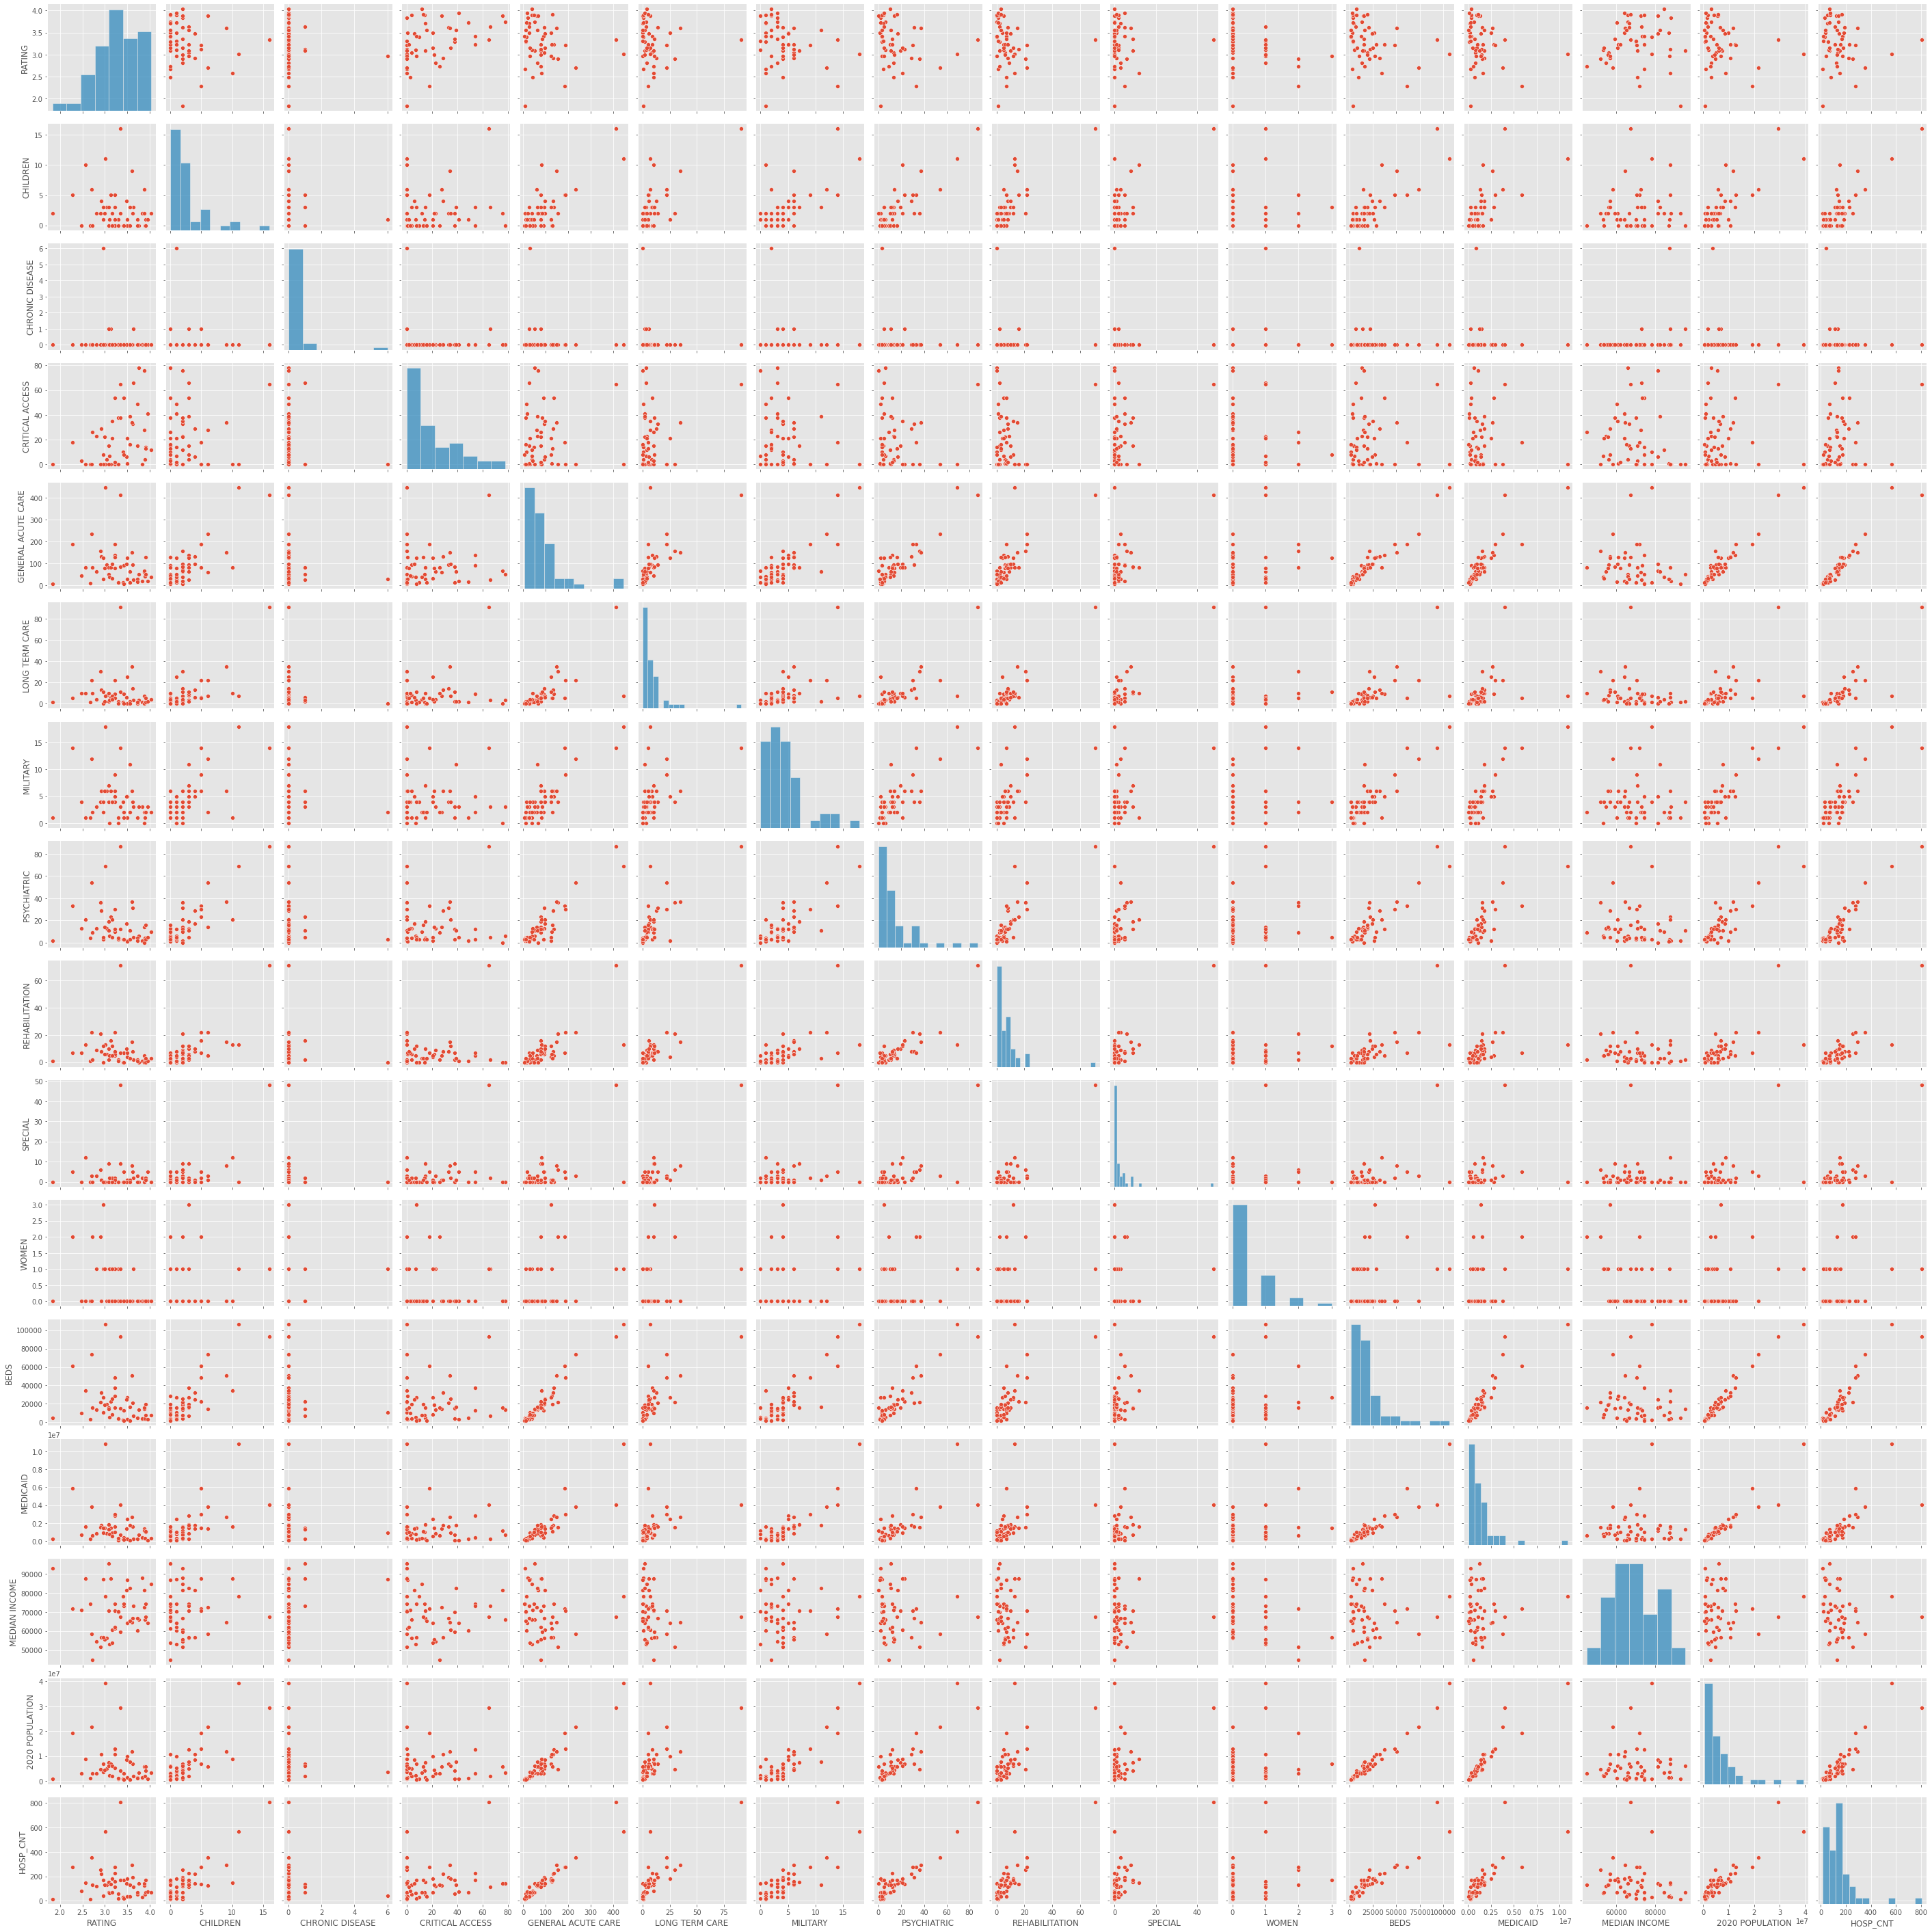

In [6]:
#this takes a bit of time to load so trimming down the variable comparison is helpful to reduce the process

pair = combined_df.filter(['State','RATING','CHILDREN','CHRONIC DISEASE','CRITICAL ACCESS',
                        'GENERAL ACUTE CARE','LONG TERM CARE','MILITARY','PSYCHIATRIC',
                        'REHABILITATION','SPECIAL','WOMEN','BEDS','MEDICAID','MEDIAN INCOME','2020 POPULATION','HOSP_CNT'], axis=1)

sns.pairplot(pair)

In [7]:
#-------------------------------------#
# RATING BY TYPE OF OWNERSHIP: TBLE1
#-------------------------------------#

# hosp_df, rating_df, medicaid_df, income_df, demographic_df

# looks like private hospital tend to have more private hospitals
rating_df.groupby(['Hospital Ownership'])[['Facility Name']].count()


,Facility Name
Hospital Ownership,
Department of Defense,35
Government - Federal,47
Government - Hospital District or Authority,536
Government - Local,420
Government - State,210
Physician,72
Proprietary,1043
Tribal,9
Voluntary non-profit - Church,321


In [24]:
#--------------------------------------------------#
# Delivering Care
#-------------------------------------------------#
# one of the criteria for rating is timeliness which would help if there are helipads availalbe
# for hospital that has trauma units

# looks like private hospital tend to have more private hospitals
hosp_sort_df.groupby(['HELIPAD','TRAUMA'])[['OBJECTID']].count()


OBJECTID
HELIPAD TRAUMA                                                  
N       CTH                                                    5
        LEVEL I                                               21
        LEVEL I PEDIATRIC                                      4
        LEVEL I PEDIATRIC REHAB, LEVEL I REHAB                 1
        LEVEL I, LEVEL I PEDIATRIC                             2
        LEVEL I, LEVEL II PEDIATRIC                            4
        LEVEL II                                              21
        LEVEL II REHAB                                         1
        LEVEL II, LEVEL II PEDIATRIC                           1
        LEVEL III                                             57
        LEVEL III PEDIATRIC                                    1
        LEVEL IV                                             136
        LEVEL V                                                4
        NOT AVAILABLE                                       3129
        TRF                                                   19
        TRH                                                   13
Y       ATH                                                    9
        CTH                                                   21
        LEVEL I                                              181
        LEVEL I PEDIATRIC                                     21
        LEVEL I PEDIATRIC REHAB                                1
        LEVEL I, LEVEL I PEDIATRIC                            16
        LEVEL I, LEVEL I PEDIATRIC, LEVEL I REHAB              1
        LEVEL I, LEVEL II PEDIATRIC                           26
        LEVEL I, LEVEL PEDIATRIC                               1
        LEVEL II                                             299
        LEVEL II PEDIATRIC                                     6
        LEVEL II, LEVEL II PEDIATRIC                          12
        LEVEL II, LEVEL II REHAB                               1
        LEVEL II, LEVEL III PEDIATRIC, LEVEL II REHAB          1
        LEVEL II, LEVEL PEDIATRIC                              1
        LEVEL III                                            424
        LEVEL III, LEVEL I REHAB                               1
        LEVEL III, LEVEL II REHAB                              1
        LEVEL III, LEVEL III PEDIATRIC                         3
        LEVEL III, LEVEL III PEDIATRIC, LEVEL II REHAB         1
        LEVEL IV                                             740
        LEVEL IV, LEVEL II REHAB                               1
        LEVEL PEDIATRIC                                        3
        LEVEL V                                               13
        NOT AVAILABLE                                       2343
        PARC                                                   1
        RPTC                                                   1
        RTC                                                    6
        RTH                                                    3
        TRF                                                   14
        TRH                                                   25

DATA CORRELATION:
----------------------------------

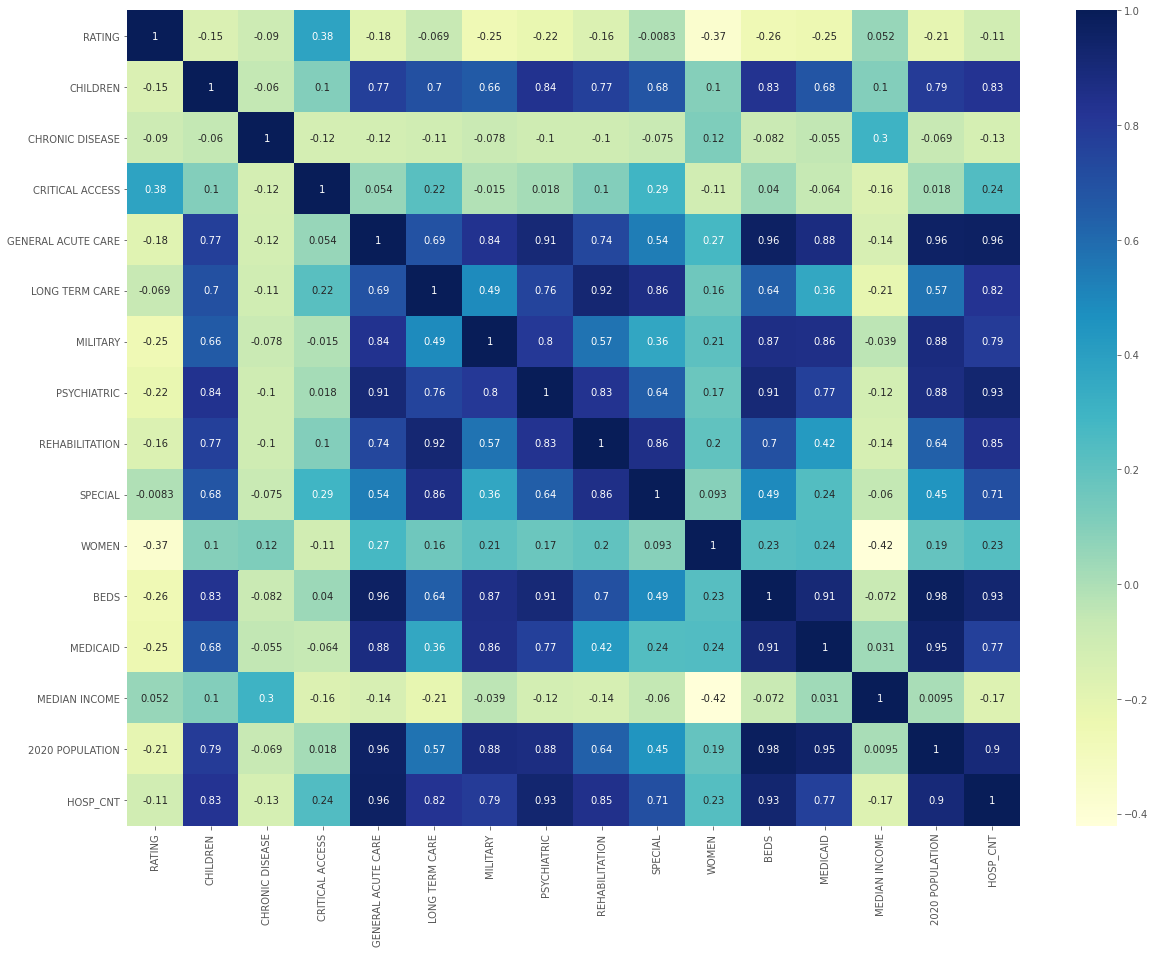

In [26]:
# correlation Matrix:

corrMatrix = pair.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

# Another method is to export and get the map that way
# corr=combined_df.corr(method='pearson')
# corr.to_csv(r'Correlation.csv') 
# # print(corr)

In [27]:
combined_df.groupby(['State'])[['2020 POPULATION', 'BEDS']].sum()

,2020 POPULATION,BEDS
State,,
AK,731158,2061
AL,4921532,19533
AR,3030522,13434
AZ,7421401,15723
CA,39368078,106452
CO,5807719,14621
CT,3557006,10483
DC,712816,4304
DE,986809,2970


In [28]:
print(hosp_df.groupby(['NAICS_CODE'])[['OBJECTID']].count())
print(hosp_df.groupby(['NAICS_CODE','NAICS_DESC'])[['OBJECTID']].count())

            OBJECTID
NAICS_CODE          
622110          6039
622210           671
622310           886
                                                               OBJECTID
NAICS_CODE NAICS_DESC                                                  
622110     CHILDREN'S HOSPITALS, GENERAL                             94
           GENERAL MEDICAL AND SURGICAL HOSPITALS                  5945
622210     CHILDREN'S HOSPITALS, PSYCHIATRIC OR SUBSTANCE ...         9
           HOSPITALS, ADDICTION                                      14
           HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)              21
           HOSPITALS, PSYCHIATRIC PEDIATRIC                           2
           HOSPITALS, SUBSTANCE ABUSE                                13
           MENTAL HEALTH HOSPITALS                                    1
           PSYCHIATRIC AND SUBSTANCE ABUSE HOSPITALS                611
622310     CHILDREN'S HOSPITALS, SPECIALTY (EXCEPT PSYCHIA...        21
           CHRONIC DISEASE HOSP

In [29]:
combined_df.describe()


,RATING,CHILDREN,CHRONIC DISEASE,CRITICAL ACCESS,GENERAL ACUTE CARE,LONG TERM CARE,MILITARY,PSYCHIATRIC,REHABILITATION,SPECIAL,...,M_60-65,M_65+,F_0-10,F_11-20,F_21-30,F_30-40,F_40-50,F_50-60,F_60-65,F_65+
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,3.272510,2.490196,0.176471,20.137255,86.490196,8.450980,4.215686,14.803922,7.392157,2.764706,...,1.879898e+05,4.370757e+05,4.201916e+05,4.036540e+05,4.364629e+05,4.257727e+05,3.988123e+05,4.265536e+05,2.059921e+05,5.488785e+05
std,0.465499,3.233404,0.865006,21.747662,87.593235,14.149648,3.833086,17.327458,10.750030,7.044397,...,2.015522e+05,4.752271e+05,4.935762e+05,4.661644e+05,5.162444e+05,5.044935e+05,4.679071e+05,4.754280e+05,2.216837e+05,5.995039e+05
min,1.833000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.497300e+04,3.296500e+04,3.211600e+04,3.630800e+04,3.641500e+04,3.682500e+04,3.174100e+04,3.550700e+04,1.774500e+04,4.216800e+04
25%,3.005500,0.000000,0.000000,1.000000,28.500000,1.000000,2.000000,3.500000,2.000000,0.000000,...,5.453550e+04,1.289950e+05,1.170545e+05,1.129675e+05,1.112910e+05,1.090600e+05,1.056280e+05,1.121875e+05,5.742350e+04,1.525400e+05
50%,3.294000,2.000000,0.000000,14.000000,65.000000,5.000000,3.000000,10.000000,5.000000,1.000000,...,1.360090e+05,3.075480e+05,2.942050e+05,2.795410e+05,2.954730e+05,2.932600e+05,2.758490e+05,3.047760e+05,1.493910e+05,3.864070e+05
75%,3.611000,3.000000,0.000000,33.500000,110.500000,10.000000,5.500000,18.000000,8.500000,2.500000,...,2.163195e+05,5.337930e+05,4.874065e+05,4.580115e+05,5.099085e+05,5.018980e+05,4.497440e+05,4.857720e+05,2.355155e+05,6.396385e+05
max,4.031000,16.000000,6.000000,78.000000,446.000000,91.000000,18.000000,87.000000,71.000000,48.000000,...,1.062184e+06,2.407080e+06,2.616637e+06,2.481413e+06,2.836273e+06,2.750748e+06,2.508375e+06,2.503145e+06,1.151702e+06,3.019076e+06


In [30]:
# Calculated column: Beds per 1,000 population

# Days per thousand: The number of hospital beds available for every 1000 inhabitants in a population
# Hospital beds are used to indicate the availability of inpatient services. There is no global norm for the density of hospital beds in relation to total population.
# calculation = (beds / population) x 1000

combined_df['beds/k']=((combined_df['BEDS']/combined_df['2020 POPULATION'])*1000)  
combined_df

# According to WHO standards, a minimum of 3 beds per 1k is required 
# US in 2017 = 2.7 beds per 1000
combined_df['Benchmark']='3' 
combined_df



,State,RATING,CHILDREN,CHRONIC DISEASE,CRITICAL ACCESS,GENERAL ACUTE CARE,LONG TERM CARE,MILITARY,PSYCHIATRIC,REHABILITATION,...,F_0-10,F_11-20,F_21-30,F_30-40,F_40-50,F_50-60,F_60-65,F_65+,beds/k,Benchmark
0,AK,3.400,0,0,10,14,1,4,3,0,...,54889,44332,51477,51073,40506,44103,21579,42168,2.818816,3
1,AL,3.039,3,0,4,93,8,6,13,6,...,320414,309251,331165,312009,310198,336521,167342,446768,3.968886,3
2,AR,2.806,2,0,23,64,4,3,13,9,...,204792,194820,200313,190691,182087,194631,97358,271496,4.432900,3
3,AZ,3.089,3,0,15,80,10,7,19,10,...,478030,469151,492389,455824,430610,445586,228282,661548,2.118603,3
4,CA,3.011,11,0,0,446,7,18,69,13,...,2616637,2481413,2836273,2750748,2508375,2503145,1151702,3019076,2.704018,3
5,CO,3.882,6,0,28,61,7,2,14,5,...,366979,354197,408903,415372,356816,357347,175620,422154,2.517512,3
6,CT,2.963,1,6,0,29,0,2,3,0,...,203904,228512,220970,222281,225752,269833,122907,331711,2.947142,3
7,DC,1.833,2,0,0,8,1,1,2,1,...,44084,36308,76298,71722,40308,36485,17745,48088,6.038024,3
8,DE,2.667,0,0,0,9,1,1,4,1,...,60335,58790,61480,61001,57371,70269,36369,97356,3.009701,3
9,FL,2.707,6,0,0,233,22,12,54,22,...,1241298,1183432,1334228,1337573,1328354,1489252,743997,2322547,3.385540,3


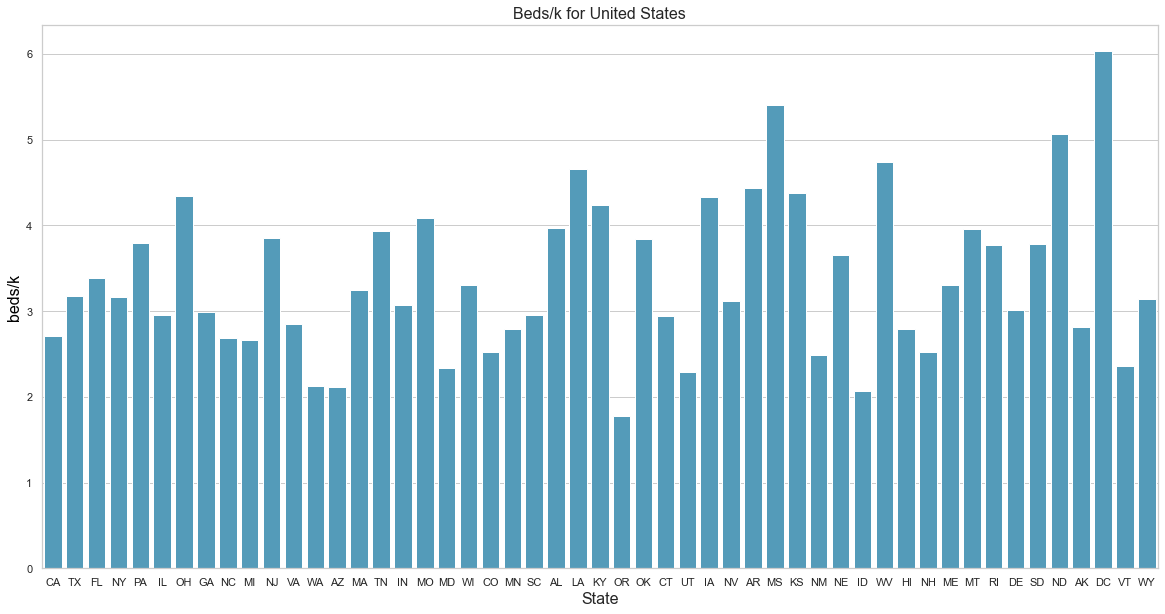

In [58]:
# Draw a scatter plot overlay with benchmark

combined_df = combined_df.sort_values('2020 POPULATION',ascending=False)


fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Beds/k for United States', fontsize=16)
ax1.set_xlabel('States', fontsize=16)
ax1.set_ylabel('Current Beds per thousand', fontsize=16, color='black')
ax2 = sns.barplot(x='State', y='beds/k', data = combined_df,color='#43a2ca')
ax1.tick_params(axis='y')

# ax2 = ax1.twinx()

# # ax2.set_ylabel('Beds/k Benchmark', fontsize=16, color='#a22a2a')
# # ax2 = sns.lineplot(x='State', y='Benchmark', data = combined_df, sort=False, color='#a22a2a', linewidth=2.5)
# ax2.lines[0].set_linestyle("--")
# ax2.tick_params(axis='y', color='#a22a2a')
# plt.show()



AxesSubplot(0.125,0.125;0.775x0.755)


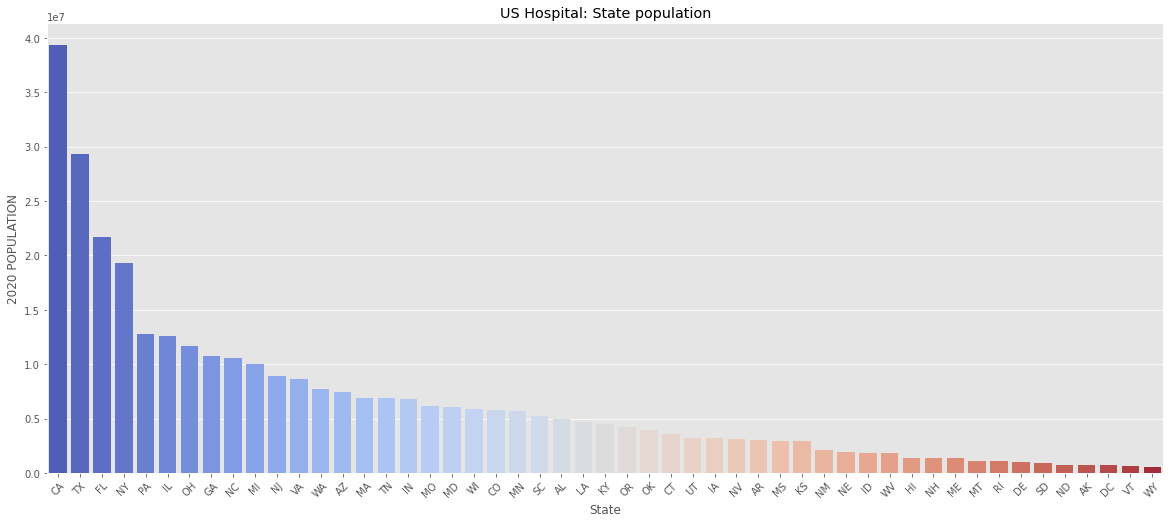

In [32]:
# Combined Data: bar plot - US population by State

sort_df = combined_df.sort_values('2020 POPULATION',ascending=False)

a4_dims = (20,8.27)
g1, ax = pyplot.subplots(figsize=a4_dims)
g1 = sns.barplot(x=sort_df['State'],y=sort_df['2020 POPULATION'], palette='coolwarm', ax=ax)
g1.set_title('US Hospital: State population')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
print(g1)


In [33]:
# Top/bottom by Population:

sort_df.head(10)
# sort_df.tail(10)

,State,RATING,CHILDREN,CHRONIC DISEASE,CRITICAL ACCESS,GENERAL ACUTE CARE,LONG TERM CARE,MILITARY,PSYCHIATRIC,REHABILITATION,...,F_0-10,F_11-20,F_21-30,F_30-40,F_40-50,F_50-60,F_60-65,F_65+,beds/k,Benchmark
4,CA,3.011,11,0,0,446,7,18,69,13,...,2616637,2481413,2836273,2750748,2508375,2503145,1151702,3019076,2.704018,3
43,TX,3.345,16,0,65,412,91,14,87,71,...,2190013,2021995,2051694,2042675,1858132,1726249,783736,1918685,3.176587,3
9,FL,2.707,6,0,0,233,22,12,54,22,...,1241298,1183432,1334228,1337573,1328354,1489252,743997,2322547,3.385540,3
34,NY,2.277,5,0,18,186,5,14,33,7,...,1201494,1132840,1389020,1316651,1210993,1364024,635783,1754910,3.165833,3
38,PA,3.217,5,0,0,188,22,9,30,22,...,767041,771288,817912,800453,759601,901326,454477,1255530,3.796999,3
14,IL,3.223,3,0,54,137,9,5,12,5,...,817713,801049,856932,845337,797403,847892,406534,1072403,2.956895,3
35,OH,3.609,9,0,34,150,35,6,37,15,...,753371,731351,769601,730608,703306,797078,404680,1068543,4.341833,3
10,GA,2.910,4,0,29,132,13,6,29,8,...,727163,718578,743953,727925,717135,708574,318090,795581,2.991405,3
27,NC,3.228,0,0,1,128,5,6,10,6,...,670563,670112,704369,680140,686713,713960,343940,918023,2.688471,3
22,MI,3.491,1,0,21,124,25,5,2,4,...,620518,621767,671295,598670,601432,695308,351628,907711,2.667823,3


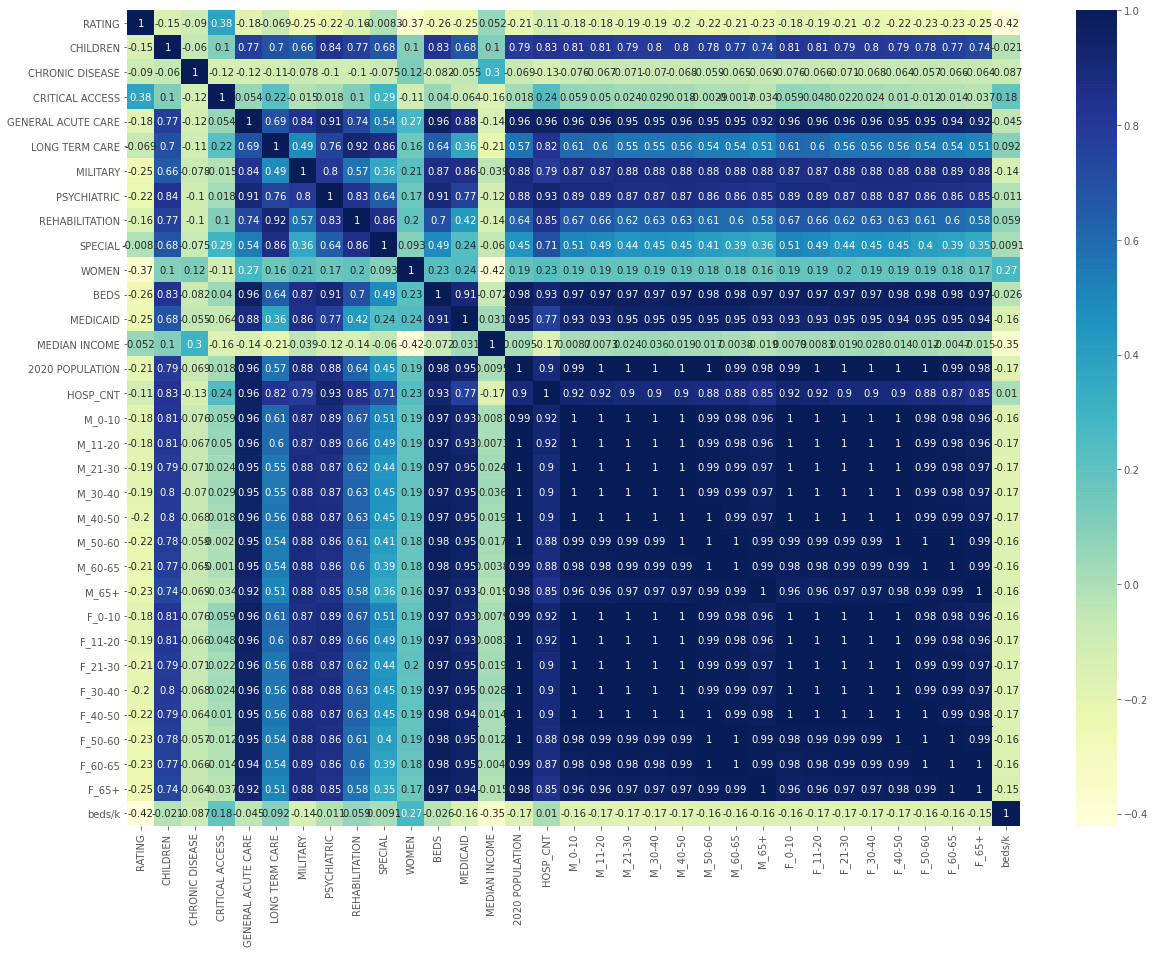

In [34]:
sort_ratio_df = combined_df.sort_values('beds/k',ascending=False)

# top 10 does not seem to have relation to the population
# sort_ratio_df.head(10)

# correlation Matrix: No high correlation between Population/Beds 
#-------------------------------------------------------------------------
corrMatrix = combined_df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

In [35]:
# Beds per Population: Calculation

per_k=sum(sort_df['beds/k'])/len(sort_df['beds/k'])
                                                  
print('Average beds per thousand lives is approximately {:,.0f}' .format(per_k))
print('Min beds per thousand lives is {:,.0f}' .format(min(sort_df['beds/k'])))
print('Maximum beds per thousand lives is {:,.0f}' .format(max(sort_df['beds/k'])))



Average beds per thousand lives is approximately 3
Min beds per thousand lives is 2
Maximum beds per thousand lives is 6


In [36]:
#-------------------------------------#
# Data Visualization: plotly - Rating
#-------------------------------------#
import plotly.graph_objects as go

import pandas as pd

df = combined_df

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['RATING'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "Hospital Rating",
))

fig.update_layout(
    title_text = 'US Hospital Ratings by State',
    geo_scope='usa', # limit map scope to USA
)

py.iplot(fig, filename = 'map1')


In [38]:
#-------------------------------------#
# Data Visualization: plotly - beds per population
#-------------------------------------#

df = combined_df

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['beds/k'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "beds/k",
))

fig.update_layout(
    title_text = 'Beds per Thousands by States',
    geo_scope='usa', # limit map scope to USA
)

py.iplot(fig, filename = 'map2')


                    OBJECTID
TYPE                        
GENERAL ACUTE CARE      4481
CRITICAL ACCESS         1027
PSYCHIATRIC              759
LONG TERM CARE           431
REHABILITATION           378
MILITARY                 216
SPECIAL                  145
CHILDREN                 130
WOMEN                     20
CHRONIC DISEASE            9


<AxesSubplot:xlabel='TYPE'>

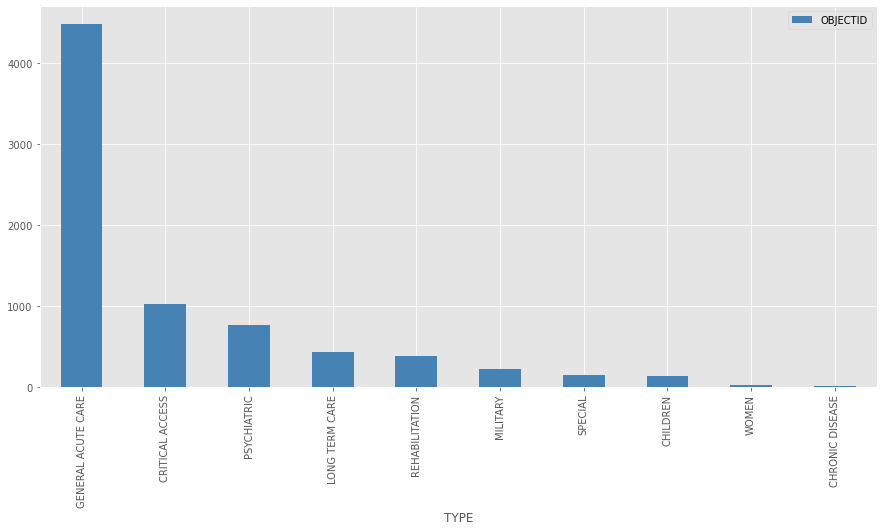

In [39]:
# histogram for the hospital type


hosp_type=hosp_df.groupby(['TYPE'])[['OBJECTID']].count()

hosp_type =hosp_type.sort_values('OBJECTID',ascending=False)
print(hosp_type)

fig, ax = plt.subplots(figsize=(15,7))
hosp_type.plot.bar(ax=ax, color='steelblue')


In [45]:
#-------------------------------------#
# Data Visualization: plotly - specific type of hospital
#-------------------------------------#

# Hospital Type = 'CHILDREN', 'CHRONIC DISEASE','CRITICAL ACCESS','GENERAL ACUTE CARE','LONG TERM CARE',
# 'MILITARY','PSYCHIATRIC','REHABILITATION','SPECIAL','WOMEN'


df = combined_df
hosp_type=df['GENERAL ACUTE CARE']

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = hosp_type.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "Hospital Count",
))

fig.update_layout(
    title_text = 'General Acute Care Hospital by State ',
    geo_scope='usa', # limit map scope to USA
)

py.iplot(fig, filename = 'map3')


In [48]:
#-------------------------------------#
# Data Visualization: plotly - income level
#-------------------------------------#
# attributes to consider: MEDIAN INCOME, POPULATION, MEDICAID, HOSP_CNT, 

df = combined_df

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['F_65+'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'GnBu',
    colorbar_title = "F_65+ Population",
))

fig.update_layout(
     title_text = 'Female 65+ Population', #change according to specified "z" attributes
    geo_scope='usa', # limit map scope to USA
)

py.iplot(fig, filename = 'map2')

<AxesSubplot:xlabel='beds/k', ylabel='M_65+'>

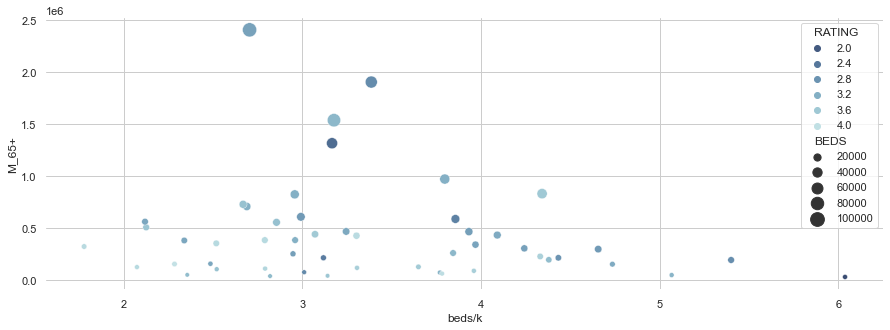

In [54]:
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="beds/k", y="M_65+",
                 hue="RATING",size="BEDS",
                 palette="ch:r=-.2,d=.3_r",
                 sizes =(20,200),
                 data=combined_df, ax=ax)


<AxesSubplot:xlabel='beds/k', ylabel='MEDIAN INCOME'>

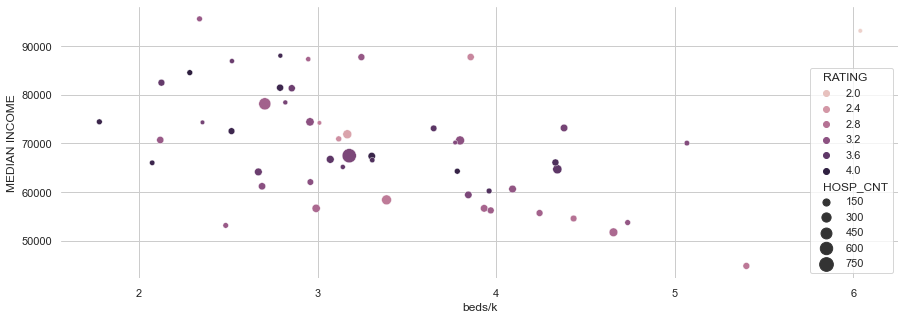

In [55]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="beds/k", y="MEDIAN INCOME",
                 hue="RATING", size="HOSP_CNT",
#                  palette="ch:r=-.2,d=.3_r",
                 sizes =(20,200),
                 data=combined_df, ax=ax)

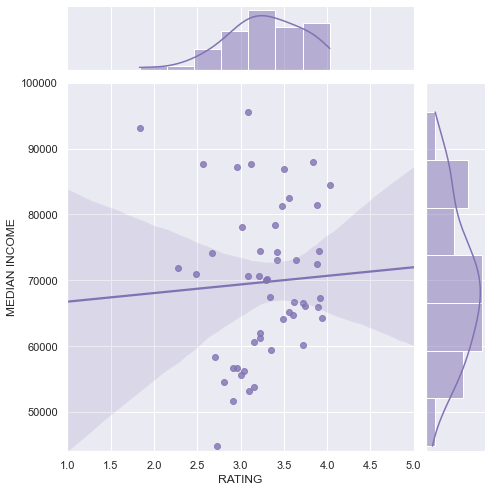

In [97]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="RATING", y="MEDIAN INCOME", data=combined_df,
                  kind="reg", truncate=False,
                  xlim=(1, 5), ylim=(44000, 100000),
                  color="m", height=7)

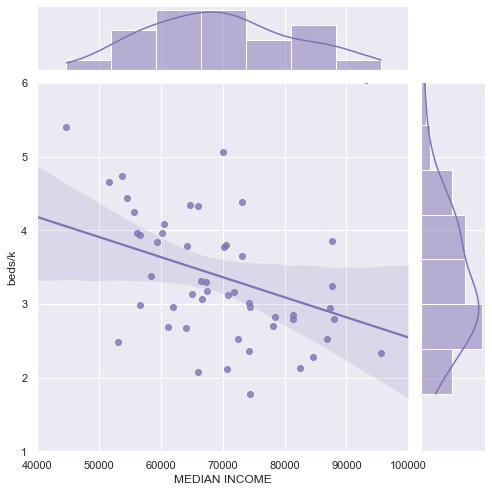

In [60]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="MEDIAN INCOME", y="beds/k", data=combined_df,
                  kind="reg", truncate=False,
                  xlim=(40000, 100000), ylim=(1, 6),
                  color="m", height=7)

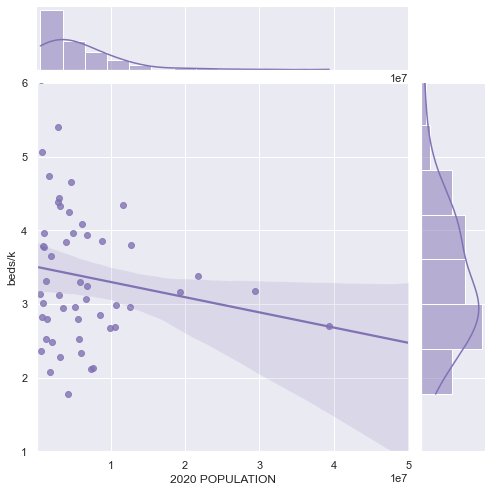

In [61]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="2020 POPULATION", y="beds/k", data=combined_df,
                  kind="reg", truncate=False,
                  xlim=(100000, 50000000), ylim=(1, 6),
                  color="m", height=7)

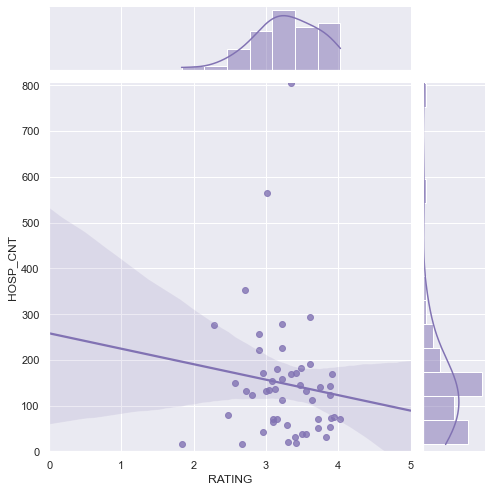

In [62]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="RATING", y="HOSP_CNT", data=combined_df,
                  kind="reg", truncate=False,
                  xlim=(0, 5), ylim=(0, 805),
                  color="m", height=7)